In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sklearn import preprocessing as pp
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
df_w5 = pd.read_stata('/Users/david.yan/Downloads/HCMST_wave_5_supplement_ver_1.dta')
df_w4 = pd.read_stata('/Users/david.yan/Downloads/wave_4_supplement_v1_2.dta')
df_w123 = pd.read_stata('/Users/david.yan/Downloads/HCMST_ver_3.04.dta')

In [4]:
w5_cols = df_w5.columns.tolist()
w4_cols = df_w4.columns.tolist()
w123_cols = df_w123.columns.tolist()

In [5]:
print(len(w5_cols), len(w4_cols), len(w123_cols))

(78, 62, 387)


In [6]:
print(df_w123.shape, df_w4.shape, df_w5.shape)

((4002, 387), (4002, 62), (4002, 78))


In [16]:
2 ** 10

1024

In [21]:
df_w123['qflag'].value_counts()

partnered                                        3009
no spouse or partner or otherwise unqualified     993
Name: qflag, dtype: int64

In [8]:
divorce_df = pd.read_excel('/Users/david.yan/Downloads/output/outputFile.xlsx', sheet_name=2)

In [9]:
divorce_df = divorce_df.transpose()
divorce_data = divorce_df.loc['1980':,0:]
divorce_header = divorce_df.loc['Year', 0:].tolist()

In [10]:
divorce_data.columns = divorce_header
divorce_data

,"Male General Divorce Rate(Per 1,000 Married Resident Males 20 Years & Over)","Female General Divorce Rate(Per 1,000 Married Resident Females 20 Years & Over)","Crude Divorce Rate(Per 1,000 Residents)"
1980,3.7,3.8,0.8
1981,4.3,4.3,0.9
1982,4.3,4.3,0.9
1983,4.3,4.3,1
1984,4.6,4.6,0.9
1985,4.6,4.6,0.9
1986,4.9,5,1
1987,4.9,5,1.1
1988,5.2,5.2,1.1
1989,5,5.1,1.1


/Users/david.yan/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


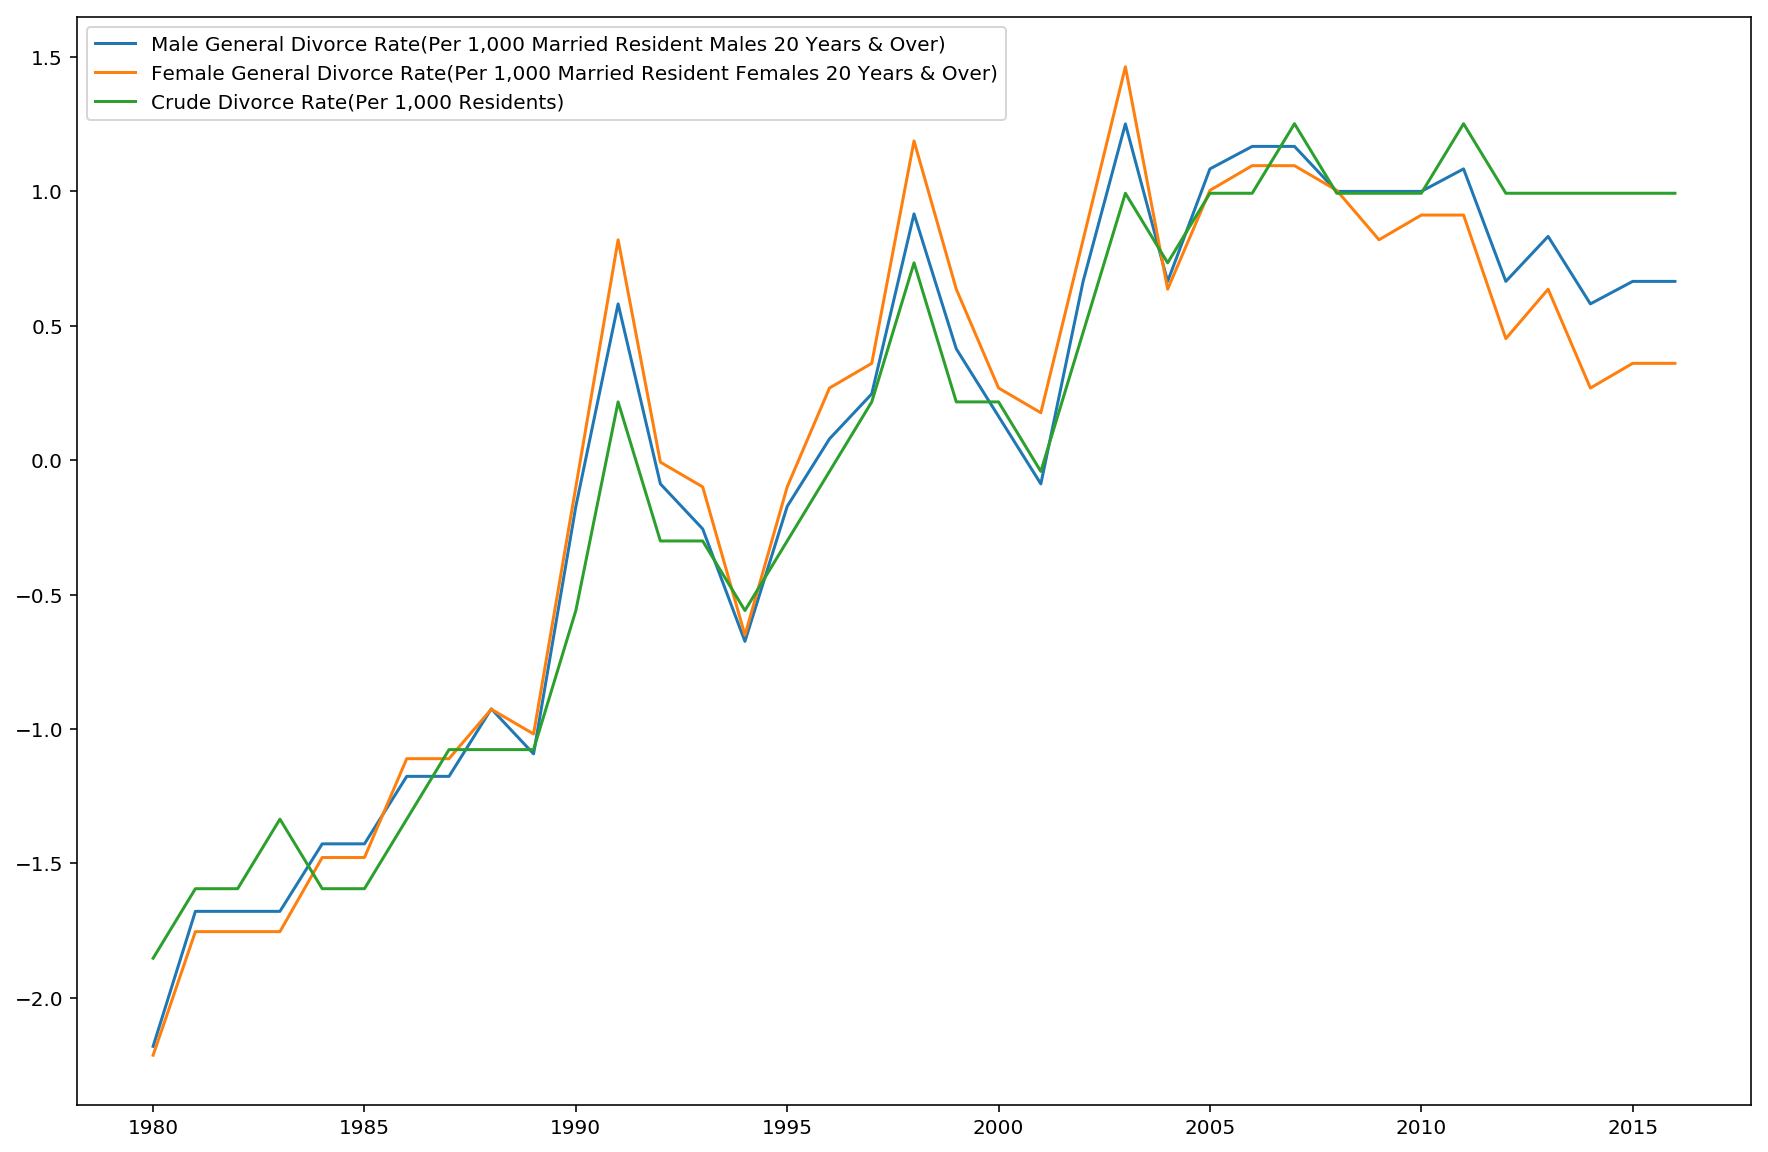

In [11]:
divorce_data.astype('float')
divorce_data.apply(pp.scale).plot(kind='line', figsize=(15,10))